Epoch 1/5
844/844 [==============================] - 17s 19ms/step - loss: 0.2130 - accuracy: 0.9380 - val_loss: 0.0740 - val_accuracy: 0.9813
Epoch 2/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0693 - accuracy: 0.9793 - val_loss: 0.0590 - val_accuracy: 0.9852
Epoch 3/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0524 - val_accuracy: 0.9857
Epoch 4/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0500 - val_accuracy: 0.9867
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0483 - accuracy: 0.9846
Test accuracy: 0.9846000075340271
313/313 [==============================] - 1s 4ms/step


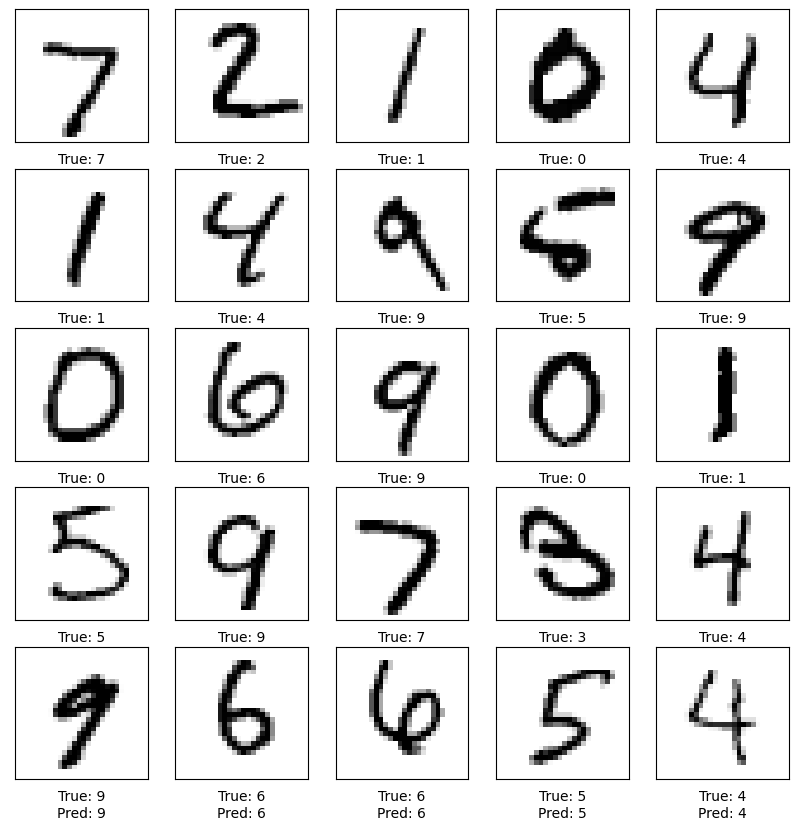

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {test_labels[i]}\nPred: {predicted_labels[i]}")
plt.show()
